In [2]:
from langgraph.graph import StateGraph, START, END
from deep_research.state import  ResearchState
from deep_research.nodes_exp import (
    section_knowledge_node,
    tavily_search_node,
    result_accumulator_node,
)

In [3]:
# <<< ----- RESEARCH AGENT ----- >>>

research_builder = StateGraph(ResearchState)

research_builder.add_node("section_knowledge", section_knowledge_node)
research_builder.add_node("tavily_search", tavily_search_node)
research_builder.add_node("result_accumulator", result_accumulator_node)

research_builder.add_edge(START, "section_knowledge")
research_builder.add_edge("section_knowledge", "tavily_search")
research_builder.add_edge("tavily_search", "result_accumulator")
research_builder.add_edge("result_accumulator", END)

agent_graph = research_builder.compile()

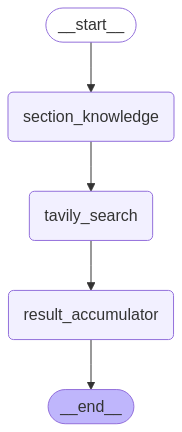

In [4]:
agent_graph

In [5]:
import uuid
thread = {
    "configurable": {
        "thread_id": str(uuid.uuid4()),
        "max_queries": 2,
        "search_depth": 2,
        "num_reflections": 2,
        "provider": "ollama",
        "model": "llama2",
        "temperature": 0.3
    }
}

In [6]:
for event in agent_graph.stream(
    {"section": "Data science"},
    config=thread,
):
    print(event)

{'section_knowledge': {'knowledge': '## Data Science: The Future of Decision Making\n\nIntroduction:\nData science has revolutionized the way organizations make decisions. With the increasing amount of data available, companies can now leverage this information to gain valuable insights and improve their operations. In this section, we will explore the concept of data science, its applications, and the benefits it offers for decision-making processes.\n\nSubsection 1: Defining Data Science\nData science is a field that combines computer science, statistics, and domain expertise to extract insights from data. It involves using various techniques such as machine learning, data mining, and predictive analytics to analyze large datasets and identify patterns, trends, and relationships. Data scientists use these insights to inform business decisions, improve operational efficiency, and create new products or services.\n\nSubsection 2: Applications of Data Science\nData science has numerous 